# Natural Language Processing (NLP) Tasks

Basic NLP includes tasks that divide the text into pieces (e.g., sentences, tokens, noun phrases), provide alternative forms for thoses pieces (e.g., lemmatization, stemming), and provide annotations/labels for those pieces (e.g., part-of-speech, position in a dependency parse tree).

The main NLP tasks in the main packages are all organized around the concept of an annotation "pipeline" based on a given "language model.

For example, the pipeline for Stanford CoreNLP is depicted below. The text is first tokenized, then split into sentences, then tokens are tagged with respect to parts of speech, then the tokens are lemmatized, then the named entity recognizer is applied, and finally the dependency parser is applied. The output is an object from which all of those annotations can be accessed.

CoreNLP Pipeline Source: https://stanfordnlp.github.io/CoreNLP/index.html

## NLTK (Natural Language Toolkit)

NLTK is the longest established NLP library. It interfaces to “over 50 corpora and lexical resources such as WordNet" (many standard corpora are available directly from NLTK).

A **corpus** is a digitized collection of text. "Corpus" is pluralized as **corpora**.

### Tokenization
It is the process of separating a paragraph into chunks or words, and it’s usually a first step in the process of text analysis.

While some functions are available with the library itself, some modules require additional downloads.

punkt is a module to work with tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

*word_tokenize*  splits a text into words and symbols and
 *sent_tokenize*  separates a paragraph into sentences

In [ ]:
from nltk.tokenize import sent_tokenize
#Text = "Good morning, Long time, No see! How you doing? "
Text="Good to see you Mary. How are you doing? Good to see you too John. I'm Good, How are you? my God"
Tokenized = sent_tokenize(Text)
print(Tokenized)

['Good to see you Mary.', 'How are you doing?', 'Good to see you too John.', "I'm Good, How are you?", 'my God']


In [ ]:
Tokenized[0:2]

['Good to see you Mary.', 'How are you doing?']

In [ ]:
from nltk.tokenize import word_tokenize
#Text = "Good morning, Long time, No see! How you doing? "
Tokenized = word_tokenize(Text)
print(Tokenized)

['Good', 'to', 'see', 'you', 'Mary', '.', 'How', 'are', 'you', 'doing', '?', 'Good', 'to', 'see', 'you', 'too', 'John', '.', 'I', "'m", 'Good', ',', 'How', 'are', 'you', '?', 'my', 'God']


###Stop words
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore. It’s important in certain situations to ignore such words, and thus having a dictionary of them can become really handy, especially when we need to deal with multiple languages. NLKT provides a module to work with step words, let’s download it next.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Since we are given a simple list of words, we can simple print it to see all of them for a particular language:

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Stop words is a simple list of words, so we can operate with it very easily, for example by writing a small routing to get a list of words without stop words in it:

In [ ]:
for i in Tokenized:
   if i not in stopwords:
       print(i)

Good
see
Mary
.
How
?
Good
see
John
.
I
'm
Good
,
How
?
God


In [ ]:
from string import punctuation
punctuation = list(punctuation)
print(punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
for i in Tokenized:
   if i not in stopwords and i not in punctuation:
       print(i)

Good
see
Mary
How
Good
see
John
I
'm
Good
How
God


#Stemming
Stemming is the process to which we transform a given word into its stem word (root word). For example, if the given word is ‘lately’, then the stemming will cut ‘ly’.

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
words = ["Loving", "Chocolate", "Retrieved", "Being","Went","gone","going"]
for i in words:
   print(ps.stem(i))

love
chocol
retriev
be
went
gone
go


In [ ]:
from nltk.stem import SnowballStemmer
ss = SnowballStemmer('english')
words = ["Loving", "Chocolate", "Retrieved", "Being","Went","gone","going"]
for i in words:
   print(ss.stem(i))

love
chocol
retriev
be
went
gone
go


#Lemmatization
Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. Lemmatization is preferred over Stemming because lemmatization does [morphological analysis](https://medium.com/@raghvendra.zarkar18/natural-language-processing-65f82c8dd7e0) of the words.
The concept of lemmatization is very similar to stemming words but lemmatization converts it to its rel base word. Let’s see an example but before we do that we need to download the WordNet package (https://wordnet.princeton.edu/) using NLTK.

In [ ]:
# import these modules
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lem= WordNetLemmatizer()
print("rocks :", lem.lemmatize("rocks"))
print("corpora :", lem.lemmatize("corpora"))
print("better :", lem.lemmatize("better"))
print("believes :", lem.lemmatize("believes"))
print("Went :", lem.lemmatize("Went"))
print("loves :", lem.lemmatize("loves"))

rocks : rock
corpora : corpus
better : better
believes : belief
Went : Went
loves : love


 The package WordNetLemmatizer has also an argument called pos which stands for “part of speech” and you can specify if you want to get the verb or noun or the adjective of the word.

In [ ]:
print("better :", lem.lemmatize("better", pos="a"))
print("better :", lem.lemmatize("better", pos="v"))
print("better :", lem.lemmatize("better", pos="n"))
print("believes :", lem.lemmatize("believes", pos='a'))
print("believes :", lem.lemmatize("believes", pos='v'))
print("believes :", lem.lemmatize("believes", pos='n'))
print("went :", lem.lemmatize("went", pos='n'))
print("went :", lem.lemmatize("went", pos='v'))
print("went :", lem.lemmatize("went", pos='a'))

better : good
better : better
better : better
believes : believes
believes : believe
believes : belief
went : went
went : go
went : went


##Counting Words
NLTK provides us a neat method to calculate the frequency of words in a text called FreqDist.

In [ ]:
words = ["men", "teacher", "men", "woman"]
FreqDist = nltk.FreqDist(words)
for i,j in FreqDist.items():
   print(i, ":", j)

men : 2
teacher : 1
woman : 1


##Word groups
Some words are being used together to give a specific meaning, for example “let’s go”, “best performance” and others. **Bigrams** is a method to extract pairs of connected words. **Trigrams** are the same as bigrams but with three words. Generally, by using the method **Ngrams** we can specify the words numbers

In [ ]:
words = "Visiting Indian Himalayas and Greek Athens as a truth seeker will surely be an amazing experience"
word_tokenize = nltk.word_tokenize(words)
print(list(nltk.bigrams(word_tokenize)))

[('Visiting', 'Indian'), ('Indian', 'Himalayas'), ('Himalayas', 'and'), ('and', 'Greek'), ('Greek', 'Athens'), ('Athens', 'as'), ('as', 'a'), ('a', 'truth'), ('truth', 'seeker'), ('seeker', 'will'), ('will', 'surely'), ('surely', 'be'), ('be', 'an'), ('an', 'amazing'), ('amazing', 'experience')]


In [ ]:
print(list(nltk.trigrams(word_tokenize)))

[('Visiting', 'Indian', 'Himalayas'), ('Indian', 'Himalayas', 'and'), ('Himalayas', 'and', 'Greek'), ('and', 'Greek', 'Athens'), ('Greek', 'Athens', 'as'), ('Athens', 'as', 'a'), ('as', 'a', 'truth'), ('a', 'truth', 'seeker'), ('truth', 'seeker', 'will'), ('seeker', 'will', 'surely'), ('will', 'surely', 'be'), ('surely', 'be', 'an'), ('be', 'an', 'amazing'), ('an', 'amazing', 'experience')]


In [ ]:
print(list(nltk.ngrams(word_tokenize, 4)))

[('Visiting', 'Indian', 'Himalayas', 'and'), ('Indian', 'Himalayas', 'and', 'Greek'), ('Himalayas', 'and', 'Greek', 'Athens'), ('and', 'Greek', 'Athens', 'as'), ('Greek', 'Athens', 'as', 'a'), ('Athens', 'as', 'a', 'truth'), ('as', 'a', 'truth', 'seeker'), ('a', 'truth', 'seeker', 'will'), ('truth', 'seeker', 'will', 'surely'), ('seeker', 'will', 'surely', 'be'), ('will', 'surely', 'be', 'an'), ('surely', 'be', 'an', 'amazing'), ('be', 'an', 'amazing', 'experience')]


##Part of Speech (PoS) tagging

[Pos tagging](https://web.stanford.edu/~jurafsky/slp3/slides/8_POSNER_intro_May_6_2021.pdf)

There are eight main parts of speech - nouns, pronouns, adjectives, verbs, adverbs, prepositions, conjunctions and interjections. Most PoS are divided into sub-classes. POS Tagging simply means labeling words with their appropriate Part-Of-Speech. POS tagging is a supervised learning solution that uses features like the previous word, next word, is first letter capitalized etc. NLTK has a function to get pos tags and it works after tokenization process. The most popular tag set is Penn Treebank tagset which is the default NLTK tagger.

In [ ]:
nltk.download('averaged_perceptron_tagger')
print(nltk.pos_tag(word_tokenize))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


[('Visiting', 'VBG'), ('Indian', 'JJ'), ('Himalayas', 'NNP'), ('and', 'CC'), ('Greek', 'NNP'), ('Athens', 'NNP'), ('as', 'IN'), ('a', 'DT'), ('truth', 'NN'), ('seeker', 'NN'), ('will', 'MD'), ('surely', 'RB'), ('be', 'VB'), ('an', 'DT'), ('amazing', 'JJ'), ('experience', 'NN')]


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Full reference list

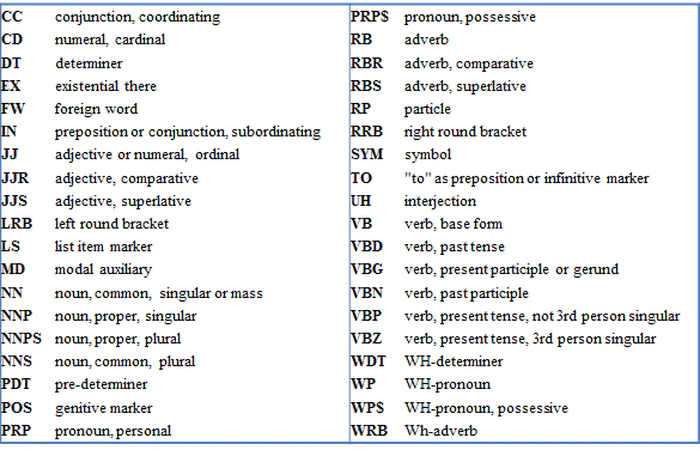

##Chunking
Chunking is a process of extracting phrases from unstructured text.Chunking works on top of POS tagging, it uses pos-tags as input and provides chunks as output. Similar to POS tags, there are a standard set of Chunk tags like Noun Phrase(NP), Verb Phrase (VP), etc. For example, chunking can be done to identify and thus group noun phrases or nouns alone, adjectives or adjective phrases, and so on. This is also known as shallow parsing.  Chunking is very important when you want to extract information from text such as Locations, Person Names etc.

Chunking is used to get the required phrases from a given sentence. However, POS tagging can be used only to spot the parts of speech that every word of the sentence belongs to. When we have loads of descriptions or modifications around a particular word or the phrase of our interest, we use chunking to grab the required phrase alone, ignoring the rest around it. Hence, chunking paves a way to group the required phrases and exclude all the modifiers around them which are not necessary for our analysis. Summing up, chunking helps us extract the important words alone from lengthy descriptions. Thus, chunking is a step in information extraction.

Interestingly, this process of chunking in NLP is extended to various other applications; for instance, to group fruits of a specific category, say, fruits rich in proteins as a group, fruits rich in vitamins as another group, and so on. Besides, chunking can also be used to group similar cars, say, cars supporting auto-gear into one group and the others which support manual gear into another chunk and so on.

###Types of Chunking

Chunking up: It returns an overview of the information. It just helps us get a brief idea of the given data.

Chunking down: It gives get detailed information.

So, if you just want an insight, consider “chunking up” otherwise prefer “chunking down”.

Chunking is done with the help of regular expressions.

In [ ]:
sample_text="""
Rama killed Ravana to save Sita from Lanka.The legend of the Ramayan is the most popular Indian epic.A lot of movies and serials have already
been shot in several languages here in India based on the Ramayana.
"""
print(sample_text)


Rama killed Ravana to save Sita from Lanka.The legend of the Ramayan is the most popular Indian epic.A lot of movies and serials have already
been shot in several languages here in India based on the Ramayana.



At first, the data has to be sentence tokenized and then word tokenized followed by tokenization, POS(part-of-speech) tagging is done for each word, in which the part-of-speech of every word will be identified. Now, we are interested only in the verb part-of-speech and wish to extract the same.
Hence, in order to chunk, we combine the part of speech tags with regular expressions. Mainly from regular expressions, we are going to utilize the following:

\+ = match 1 or more repetitions

? = match 0 or 1 repetitions.

\* = match 0 or more repetitions

. = Any character except a new line

In [ ]:
from nltk import RegexpParser
from nltk.tree import *
patterns= """mychunk:{<NN.?>*<VBD.?>*<JJ.?>*<CC>?}"""
chunker = RegexpParser(patterns)
print("After Regex:",chunker)

After Regex: chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?>*<VBD.?>*<JJ.?>*<CC>?'>


In [ ]:
word_tokenize = nltk.word_tokenize(sample_text)
tokens_tag =nltk.pos_tag(word_tokenize)
print("After Token:",tokens_tag)

After Token: [('Rama', 'NNP'), ('killed', 'VBD'), ('Ravana', 'NNP'), ('to', 'TO'), ('save', 'VB'), ('Sita', 'NNP'), ('from', 'IN'), ('Lanka.The', 'NNP'), ('legend', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Ramayan', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('most', 'RBS'), ('popular', 'JJ'), ('Indian', 'JJ'), ('epic.A', 'NN'), ('lot', 'NN'), ('of', 'IN'), ('movies', 'NNS'), ('and', 'CC'), ('serials', 'NNS'), ('have', 'VBP'), ('already', 'RB'), ('been', 'VBN'), ('shot', 'VBN'), ('in', 'IN'), ('several', 'JJ'), ('languages', 'NNS'), ('here', 'RB'), ('in', 'IN'), ('India', 'NNP'), ('based', 'VBN'), ('on', 'IN'), ('the', 'DT'), ('Ramayana', 'NNP'), ('.', '.')]


In [ ]:
output = chunker.parse(tokens_tag)
print("After Chunking",output)

After Chunking (S
  (mychunk Rama/NNP killed/VBD)
  (mychunk Ravana/NNP)
  to/TO
  save/VB
  (mychunk Sita/NNP)
  from/IN
  (mychunk Lanka.The/NNP legend/NN)
  of/IN
  the/DT
  (mychunk Ramayan/NNP)
  is/VBZ
  the/DT
  most/RBS
  (mychunk popular/JJ Indian/JJ)
  (mychunk epic.A/NN lot/NN)
  of/IN
  (mychunk movies/NNS and/CC)
  (mychunk serials/NNS)
  have/VBP
  already/RB
  been/VBN
  shot/VBN
  in/IN
  (mychunk several/JJ)
  (mychunk languages/NNS)
  here/RB
  in/IN
  (mychunk India/NNP)
  based/VBN
  on/IN
  the/DT
  (mychunk Ramayana/NNP)
  ./.)


In [ ]:
output.pretty_print()

                                                                                                                                            S                                                                                                                                                                                                                                               
   _________________________________________________________________________________________________________________________________________|________________________________________________________________________________________________________________________________________________________________________________________________________________________________________        
  |      |       |      |     |      |      |       |       |      |         |         |        |       |      |      |       |       |     |     |           mychunk             mychunk   mychunk                mychunk             mychun

In [ ]:
text = "Discover the essence of spirituality from authentic Gurus, and steer clear of pseudo Gurus – they abound. During a visit to Rishikesh, I encountered genuine masters after investing tremendous effort."
tokens = nltk.word_tokenize(text)
print(tokens)
tag = nltk.pos_tag(tokens)
print(tag)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
result.pretty_print()
#result.draw()    # It will draw the pattern graphically which can be seen in Noun Phrase chunking

['Discover', 'the', 'essence', 'of', 'spirituality', 'from', 'authentic', 'Gurus', ',', 'and', 'steer', 'clear', 'of', 'pseudo', 'Gurus', '–', 'they', 'abound', '.', 'During', 'a', 'visit', 'to', 'Rishikesh', ',', 'I', 'encountered', 'genuine', 'masters', 'after', 'investing', 'tremendous', 'effort', '.']
[('Discover', 'IN'), ('the', 'DT'), ('essence', 'NN'), ('of', 'IN'), ('spirituality', 'NN'), ('from', 'IN'), ('authentic', 'JJ'), ('Gurus', 'NNP'), (',', ','), ('and', 'CC'), ('steer', 'VBD'), ('clear', 'JJ'), ('of', 'IN'), ('pseudo', 'JJ'), ('Gurus', 'NNP'), ('–', 'NNP'), ('they', 'PRP'), ('abound', 'VBP'), ('.', '.'), ('During', 'IN'), ('a', 'DT'), ('visit', 'NN'), ('to', 'TO'), ('Rishikesh', 'NNP'), (',', ','), ('I', 'PRP'), ('encountered', 'VBD'), ('genuine', 'JJ'), ('masters', 'NNS'), ('after', 'IN'), ('investing', 'VBG'), ('tremendous', 'JJ'), ('effort', 'NN'), ('.', '.')]
(S
  Discover/IN
  (NP the/DT essence/NN)
  of/IN
  (NP spirituality/NN)
  from/IN
  authentic/JJ
  Gurus/N

##Named Entity Recognition (NER)
The tagged object can be passed to a named entity "chunker." A chunker divides the tokens into "chunks" -- non-overlapping sequences of tokens

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
Text = "The russian president Vladimir Putin is in the Kremlin"
Tokenize = nltk.word_tokenize(Text)
POS_tags = nltk.pos_tag(Tokenize)
NameEn = nltk.ne_chunk(POS_tags)
print(NameEn)

(S
  The/DT
  russian/JJ
  president/NN
  (PERSON Vladimir/NNP Putin/NNP)
  is/VBZ
  in/IN
  the/DT
  (FACILITY Kremlin/NNP))


In [ ]:
NameEn = nltk.ne_chunk(POS_tags,binary=False)
print(NameEn)

(S
  The/DT
  russian/JJ
  president/NN
  (PERSON Vladimir/NNP Putin/NNP)
  is/VBZ
  in/IN
  the/DT
  (FACILITY Kremlin/NNP))
